# ***Analysis of Gold Price, Supply and Demand in India***

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Scraping the data form the website**

In [2]:
url = 'https://www.bankbazaar.com/gold-rate/gold-rate-trend-in-india.html'
tables = pd.read_html(url)

for i, tbl in enumerate(tables):
    print(f"--- Table {i} ---")
    display(tbl.head())

gold_rates = tables[0]
gold_rates.head()

--- Table 0 ---


,Year,Price (24 karat per 10 grams)
0,1964,Rs.63.25
1,1965,Rs.71.75
2,1966,Rs.83.75
3,1967,Rs.102.50
4,1968,Rs.162.00


,Year,Price (24 karat per 10 grams)
0,1964,Rs.63.25
1,1965,Rs.71.75
2,1966,Rs.83.75
3,1967,Rs.102.50
4,1968,Rs.162.00


In [3]:
gold_rates['Price (24 karat per 10 grams)'] = (
    gold_rates['Price (24 karat per 10 grams)']
    .astype(str)
    .str.replace('Rs.', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

gold_rates.head()

,Year,Price (24 karat per 10 grams)
0,1964,63.25
1,1965,71.75
2,1966,83.75
3,1967,102.50
4,1968,162.00


In [4]:
gold_rates.rename(columns={'Price (24 karat per 10 grams)': 'Price per 10gm'}, inplace=True)

In [5]:
gold_rates['Year'] = gold_rates['Year'].astype(str).str.extract(r'(\d{4})')[0].astype(int)

In [6]:
gold_rates

,Year,Price per 10gm
0,1964,63.25
1,1965,71.75
2,1966,83.75
3,1967,102.50
4,1968,162.00
...,...,...
56,2021,48720.00
57,2022,52670.00
58,2023,65330.00
59,2024,77913.00


In [7]:
gold_rates.to_csv('gold_rates_india.csv', index=False)

# *Visualizing the Gold Price in India from 1964-2025***

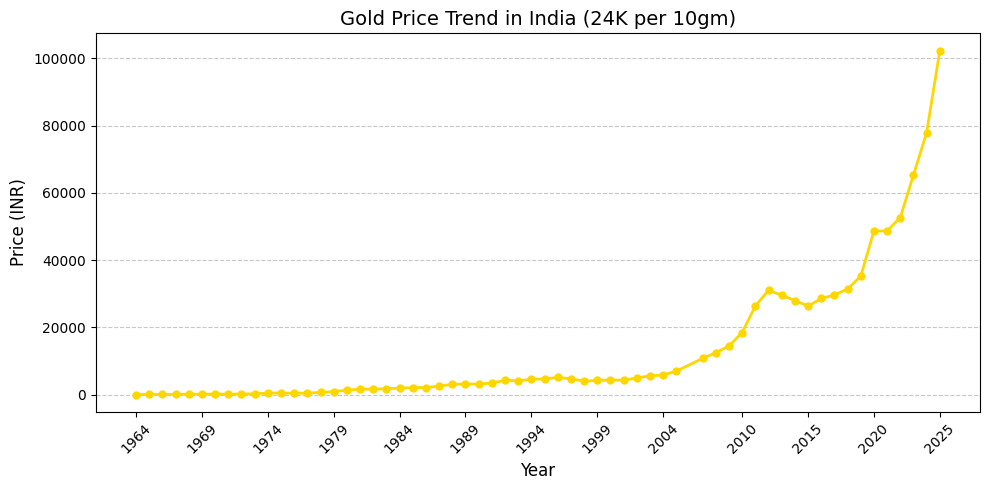

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(gold_rates['Year'], gold_rates['Price per 10gm'], 
         marker='o', color='gold', linewidth=2, markersize=5)

plt.xticks(gold_rates['Year'][::5], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Gold Price Trend in India (24K per 10gm)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price (INR)', fontsize=12)

plt.tight_layout()
plt.show()

# *Performing ARIMA forecasting to predict future gold price*

In [9]:
from statsmodels.tsa.arima.model import ARIMA
gold_rates_ts = gold_rates.copy()
gold_rates_ts['Year'] = gold_rates_ts['Year'].astype(int)
gold_rates_ts = gold_rates_ts.set_index('Year')
gold_rates_ts = gold_rates_ts.asfreq('Y')

In [10]:
df_price = gold_rates.copy()
df_price['Year'] = df_price['Year'].astype(int)

df_price['Date'] = pd.to_datetime(df_price['Year'], format='%Y')
df_price = df_price.set_index('Date')

price_series = df_price['Price per 10gm']

In [11]:
model = ARIMA(price_series, order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [12]:
forecast = model_fit.forecast(steps=10)

future_years = pd.date_range(start=price_series.index[-1] + pd.DateOffset(years=1), periods=10, freq='Y')
forecast_df = pd.DataFrame({'Forecasted Price': forecast.values}, index=future_years)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


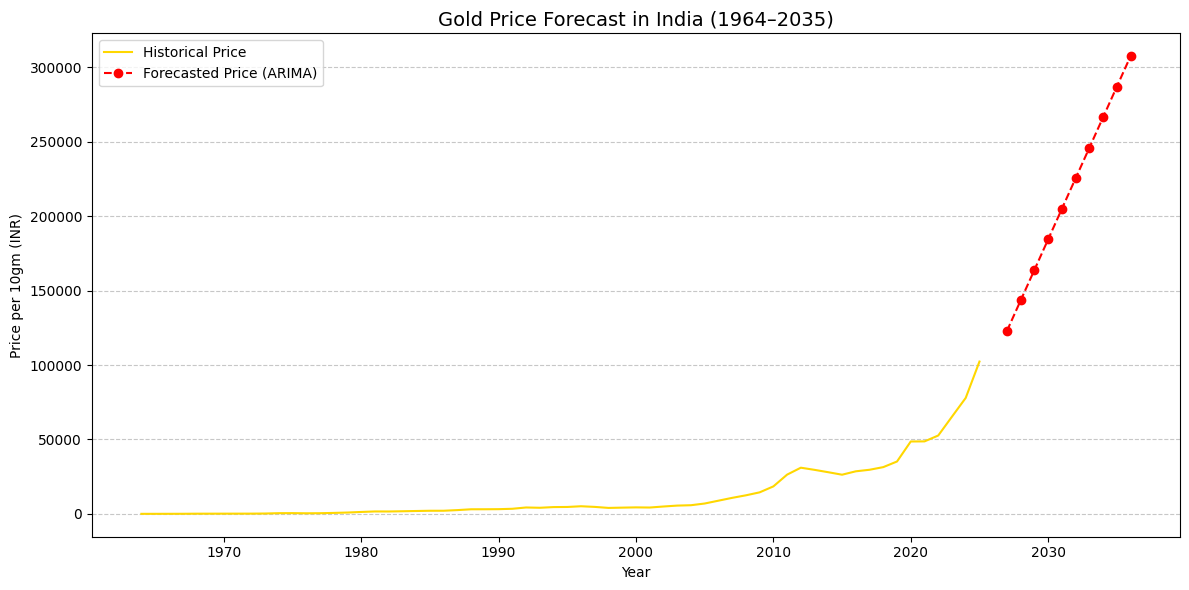

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(price_series, label='Historical Price', color='gold')
plt.plot(forecast_df, label='Forecasted Price (ARIMA)', linestyle='--', marker='o', color='red')

plt.title('Gold Price Forecast in India (1964–2035)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Price per 10gm (INR)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# **Now Analyzing Supply and Demand of Gold in India**

In [14]:
file = '/kaggle/input/gold-analysis/gdt-tables-q1-2025-EN.xlsx'
xls  = pd.ExcelFile(file)
print("Sheets in workbook:", xls.sheet_names)

Sheets in workbook: ['AppQt.Data', 'AppAn.Data', 'Jewellery', 'Consumer', 'Prices', 'India Supply']


In [15]:
df_demand = pd.read_excel(
    file,
    sheet_name='Consumer',
    header=4,
    index_col=1
)

df_demand.head()

,Unnamed: 0,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 17,Year-on-year % change
India,NaN,1001.711972,974.022372,914.151377,956.678807,832.510410,857.239343,666.085575,771.218152,760.413835,690.406834,446.370154,797.342588,774.123217,760.952660,802.784705,▲,5.497326
Pakistan,NaN,33.829500,39.946141,39.390174,44.245923,35.779776,37.639770,42.243683,44.929617,40.172315,38.038191,28.759723,41.188963,44.286469,43.015835,36.487829,▼,-15.175819
Sri Lanka,NaN,0.000000,0.000000,0.000000,0.000000,9.122500,10.660850,10.471097,11.181415,9.604772,7.887049,4.272329,4.094454,3.912522,10.489864,5.777776,▼,-44.920387
Greater China,NaN,676.261439,873.035678,918.341645,1449.787242,1083.677810,1062.154809,985.047073,1029.705936,1058.390947,899.519957,641.300828,993.697125,824.916555,959.164297,856.995300,▼,-10.651877
"China, P.R.: Mainland",NaN,645.741846,816.275193,856.321980,1345.506307,1005.285773,995.549707,929.371044,971.552826,994.347980,849.127976,612.653828,958.833125,789.011555,909.748297,815.350660,▼,-10.376237


In [16]:
df_demand_cleaned = df_demand.drop(columns=['Unnamed: 0'])

cols_to_drop = [col for col in df_demand_cleaned.columns if str(col).startswith('Unnamed:') or str(col).startswith('Year-on-year')]
df_demand_cleaned = df_demand_cleaned.drop(columns=cols_to_drop)

df_demand_cleaned.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
India,1001.711972,974.022372,914.151377,956.678807,832.510410,857.239343,666.085575,771.218152,760.413835,690.406834,446.370154,797.342588,774.123217,760.952660,802.784705
Pakistan,33.829500,39.946141,39.390174,44.245923,35.779776,37.639770,42.243683,44.929617,40.172315,38.038191,28.759723,41.188963,44.286469,43.015835,36.487829
Sri Lanka,0.000000,0.000000,0.000000,0.000000,9.122500,10.660850,10.471097,11.181415,9.604772,7.887049,4.272329,4.094454,3.912522,10.489864,5.777776
Greater China,676.261439,873.035678,918.341645,1449.787242,1083.677810,1062.154809,985.047073,1029.705936,1058.390947,899.519957,641.300828,993.697125,824.916555,959.164297,856.995300
"China, P.R.: Mainland",645.741846,816.275193,856.321980,1345.506307,1005.285773,995.549707,929.371044,971.552826,994.347980,849.127976,612.653828,958.833125,789.011555,909.748297,815.350660


In [17]:
df_demand = df_demand_cleaned.loc[:'India']
df_demand.T

,India
2010,1001.711972
2011,974.022372
2012,914.151377
2013,956.678807
2014,832.510410
2015,857.239343
2016,666.085575
2017,771.218152
2018,760.413835
2019,690.406834


In [18]:
df_demand.rename(columns={'India': 'Demand in Tonnes'}, inplace=True)
df_demand.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
India,1001.711972,974.022372,914.151377,956.678807,832.51041,857.239343,666.085575,771.218152,760.413835,690.406834,446.370154,797.342588,774.123217,760.95266,802.784705


In [19]:
df_demand = df_demand.T

df_demand.columns = ['Demand in Tonnes']

df_demand.index.name = 'Year'
df_demand = df_demand.reset_index()

df_demand.head()

,Year,Demand in Tonnes
0,2010,1001.711972
1,2011,974.022372
2,2012,914.151377
3,2013,956.678807
4,2014,832.510410


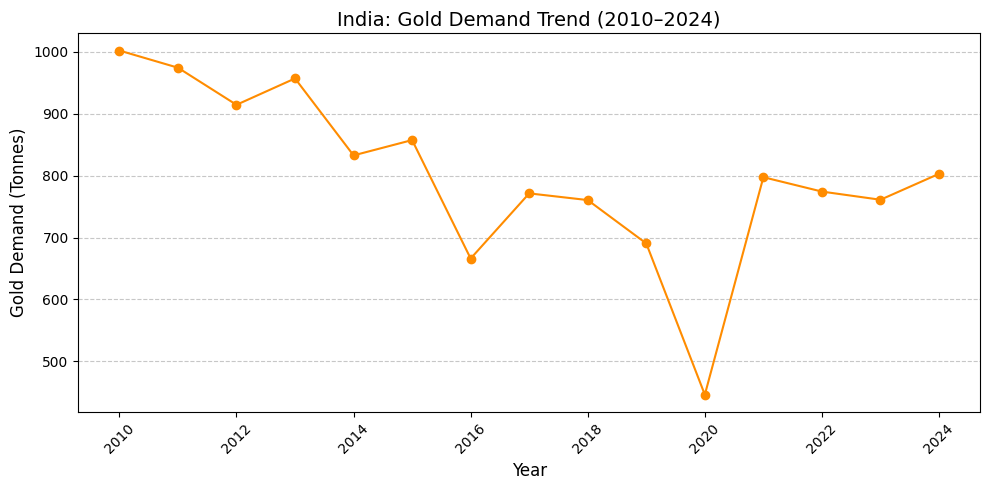

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(df_demand['Year'], df_demand['Demand in Tonnes'], marker='o', color='darkorange')

plt.title('India: Gold Demand Trend (2010–2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Gold Demand (Tonnes)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
df_supply = pd.read_excel(
    file,
    sheet_name='India Supply',
    header=3,
    index_col=1
)

df_supply

,Unnamed: 0,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72
Indian supply estimates (tonnes),,,,,,,,,,,,,,,,,,,,,
NaN,NaN,2012.000000,2013.000000,2014.000000,2015.000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,...,Q2'23,Q3'23,Q4'23,Q1'24,Q2'24,Q3'24,Q4'24,Q1'25,NaN,Year-on-year % change
Supply,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gross Bullion imports,NaN,974.451600,962.896800,997.159100,1075.164,688.028000,1050.510500,895.608375,838.888875,399.808562,...,188.197508,202.605187,249.57493,170.446382,160.620195,267.676037,231.620576,170.361799,▼,-0.049625
of which doré1,NaN,23.192100,36.886400,84.144000,229.010,141.870000,250.630000,275.901000,211.480000,107.608000,...,59.44579,79.857,51.2759,47.32075,52.648,96.564606,61.686658,33.04171,▼,-30.175008
Net bullion imports,NaN,842.803392,879.946949,901.004095,923.764,597.456604,954.182517,779.579198,658.250039,349.703562,...,182.197508,192.210187,225.26218,155.446382,155.220195,263.518037,229.120576,167.361799,▲,7.66529
Scrap,NaN,118.000000,95.750000,92.500000,80.200,79.500000,88.399000,86.977099,119.528342,95.519011,...,37.561748,19.163269,25.616335,38.257336,23.006571,23.406564,29.641759,26.014988,▼,-32.0
Domestic supply from other sources2,NaN,10.000000,9.590000,9.930000,9.200,9.900000,8.800000,10.500000,11.100000,9.000000,...,3.2,3.5,4.43591,5.33906,3.68041,4.223,4.5,4.27219,▼,-19.982356
Total supply3,NaN,970.803392,985.286949,1003.434095,1013.164,686.856604,1051.381517,877.056297,788.878381,454.222573,...,222.959255,214.873457,255.314425,199.042778,181.907176,291.147601,263.262335,197.648977,▼,-0.700252
"1 Volume of fine gold material contained in the doré.\n2 Domestic supply from local mine production, recovery from imported copper concentrates and disinvestment.\n3 This supply can be consumed across the three sectors – jewellery, investment and technology. Consequently, the total supply figure in the table will not add to jewellery plus investment demand for India.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_supply_cleaned = df_supply[df_supply.index.isna() | (df_supply.index == 'Total supply3')]

df_supply_cleaned

,Unnamed: 0,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72
Indian supply estimates (tonnes),,,,,,,,,,,,,,,,,,,,,
NaN,NaN,2012.000000,2013.000000,2014.000000,2015.000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,...,Q2'23,Q3'23,Q4'23,Q1'24,Q2'24,Q3'24,Q4'24,Q1'25,NaN,Year-on-year % change
Total supply3,NaN,970.803392,985.286949,1003.434095,1013.164,686.856604,1051.381517,877.056297,788.878381,454.222573,...,222.959255,214.873457,255.314425,199.042778,181.907176,291.147601,263.262335,197.648977,▼,-0.700252
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_supply_cleaned = df_supply_cleaned.drop(columns=['Unnamed: 0'])
cols_to_drop = [col for col in df_supply_cleaned.columns if str(col).startswith('Unnamed:') and int(col.split(':')[1]) >= 15]
df_supply_cleaned = df_supply_cleaned.drop(columns=cols_to_drop)

df_supply_cleaned

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
Indian supply estimates (tonnes),,,,,,,,,,,,,
NaN,2012.000000,2013.000000,2014.000000,2015.000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2021.000000,2022.000000,2023.000000,2024.00000
Total supply3,970.803392,985.286949,1003.434095,1013.164,686.856604,1051.381517,877.056297,788.878381,454.222573,987.689058,753.917801,877.178972,935.35989
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_supply_cleaned.columns = df_supply_cleaned.iloc[0]
df_supply_cleaned = df_supply_cleaned.drop(df_supply_cleaned.index[0])

df_supply_cleaned.index = ['Total Supply (tonnes)']
df_supply_cleaned = df_supply_cleaned.transpose()
df_supply_cleaned.index.name = 'Year'
df_supply_cleaned = df_supply_cleaned.reset_index()

df_supply_cleaned

,Year,Total Supply (tonnes)
0,2012.0,970.803392
1,2013.0,985.286949
2,2014.0,1003.434095
3,2015.0,1013.164000
4,2016.0,686.856604
5,2017.0,1051.381517
6,2018.0,877.056297
7,2019.0,788.878381
8,2020.0,454.222573
9,2021.0,987.689058


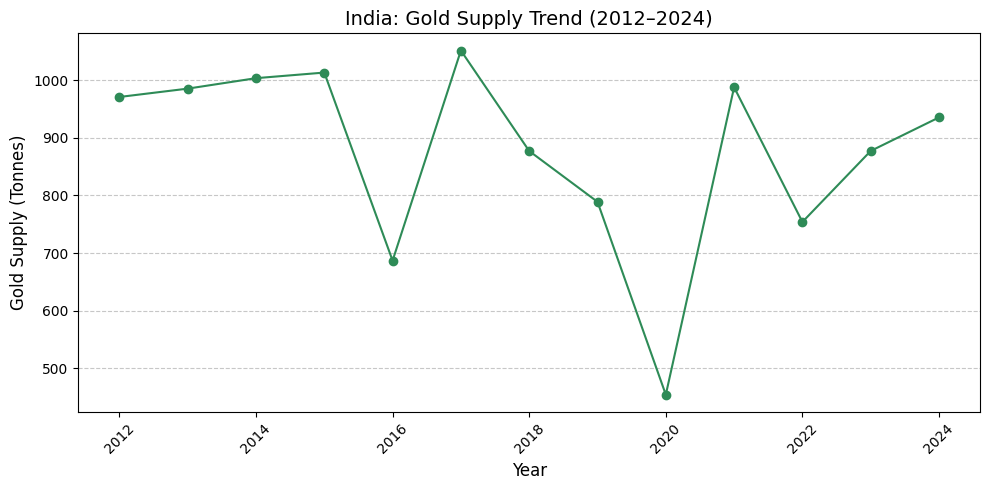

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(df_supply_cleaned['Year'], df_supply_cleaned['Total Supply (tonnes)'], marker='o', color='seagreen')

plt.title('India: Gold Supply Trend (2012–2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Gold Supply (Tonnes)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
df_merged = pd.merge(df_demand, df_supply_cleaned, on='Year')
df_merged.head()

,Year,Demand in Tonnes,Total Supply (tonnes)
0,2012,914.151377,970.803392
1,2013,956.678807,985.286949
2,2014,832.510410,1003.434095
3,2015,857.239343,1013.164000
4,2016,666.085575,686.856604


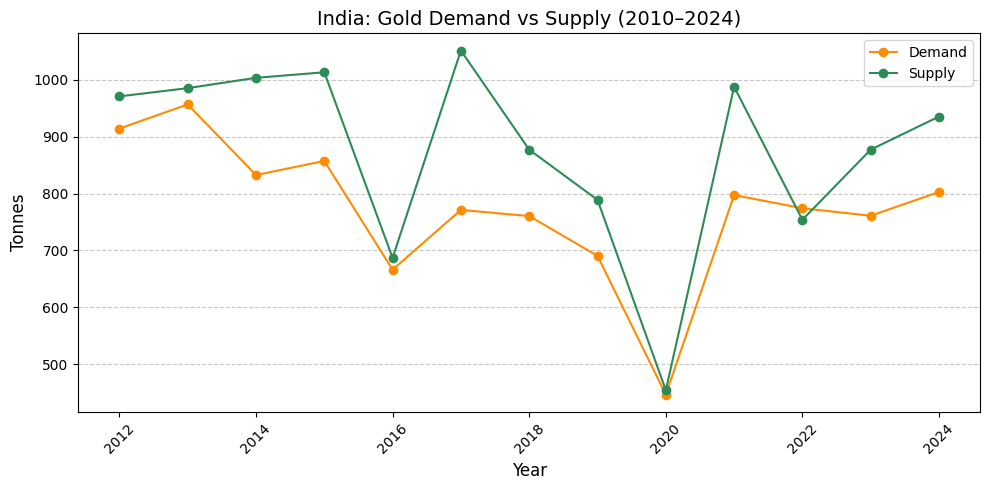

In [27]:
plt.figure(figsize=(10, 5))

plt.plot(df_merged['Year'], df_merged['Demand in Tonnes'], marker='o', label='Demand', color='darkorange')

plt.plot(df_merged['Year'], df_merged['Total Supply (tonnes)'], marker='o', label='Supply', color='seagreen')

plt.title('India: Gold Demand vs Supply (2010–2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Tonnes', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
gold_rates['Year'] = gold_rates['Year'].astype(str)
gold_rates['Year'] = gold_rates['Year'].str.extract(r'(\d{4})')

gold_rates['Year'] = gold_rates['Year'].astype(int)
gold_rates_filtered = gold_rates[gold_rates['Year'].between(2010, 2024)]

gold_rates_filtered

,Year,Price per 10gm
45,2010,18500.0
46,2011,26400.0
47,2012,31050.0
48,2013,29600.0
49,2014,28006.5
50,2015,26343.5
51,2016,28623.5
52,2017,29667.5
53,2018,31438.0
54,2019,35220.0


In [29]:
df_all = pd.merge(df_merged, gold_rates_filtered, on='Year', how='inner')
df_all

,Year,Demand in Tonnes,Total Supply (tonnes),Price per 10gm
0,2012,914.151377,970.803392,31050.0
1,2013,956.678807,985.286949,29600.0
2,2014,832.510410,1003.434095,28006.5
3,2015,857.239343,1013.164000,26343.5
4,2016,666.085575,686.856604,28623.5
5,2017,771.218152,1051.381517,29667.5
6,2018,760.413835,877.056297,31438.0
7,2019,690.406834,788.878381,35220.0
8,2020,446.370154,454.222573,48651.0
9,2021,797.342588,987.689058,48720.0


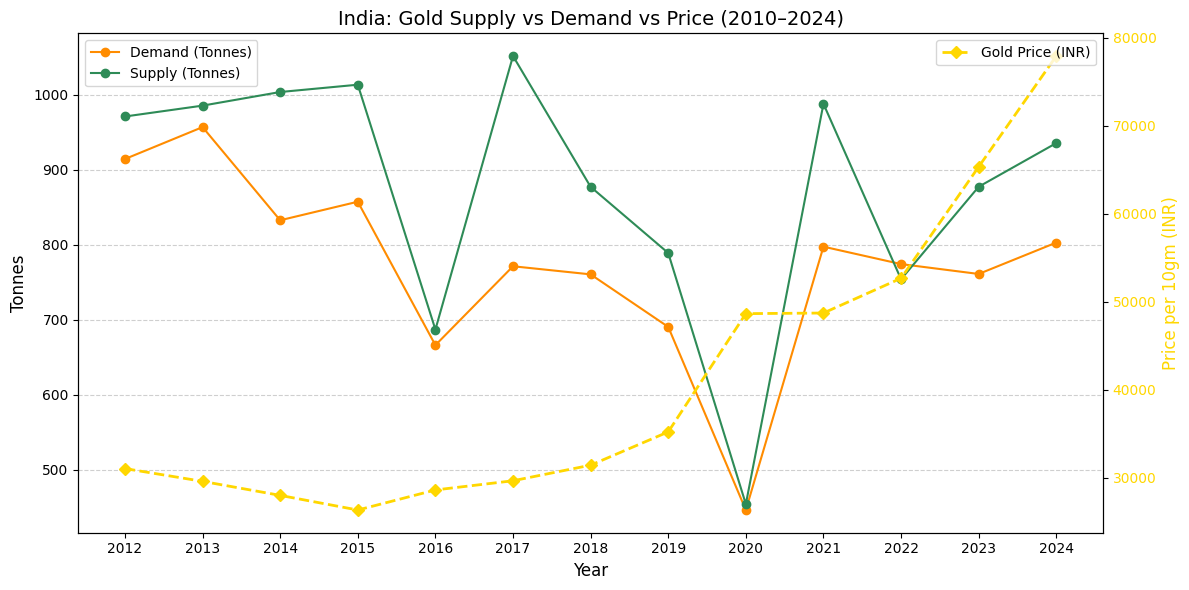

In [30]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_all['Year'], df_all['Demand in Tonnes'], marker='o', label='Demand (Tonnes)', color='darkorange')
ax1.plot(df_all['Year'], df_all['Total Supply (tonnes)'], marker='o', label='Supply (Tonnes)', color='seagreen')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Tonnes', fontsize=12)
ax1.tick_params(axis='y')
ax1.grid(axis='y', linestyle='--', alpha=0.6)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(df_all['Year'], df_all['Price per 10gm'], marker='D', linestyle='--', label='Gold Price (INR)', color='gold', linewidth=2)
ax2.set_ylabel('Price per 10gm (INR)', fontsize=12, color='gold')
ax2.tick_params(axis='y', labelcolor='gold')
ax2.legend(loc='upper right')

plt.title('India: Gold Supply vs Demand vs Price (2010–2024)', fontsize=14)
plt.xticks(df_all['Year'], rotation=45)
plt.tight_layout()
plt.show()

# **Performing Granger Causality Test**

In [31]:
from statsmodels.tsa.stattools import grangercausalitytests

df_cause = df_all[['Demand in Tonnes', 'Price per 10gm']]

#granger causality test
grangercausalitytests(df_cause, maxlag=3, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3124  , p=0.5899  , df_denom=9, df_num=1
ssr based chi2 test:   chi2=0.4165  , p=0.5187  , df=1
likelihood ratio test: chi2=0.4094  , p=0.5223  , df=1
parameter F test:         F=0.3124  , p=0.5899  , df_denom=9, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2782  , p=0.7664  , df_denom=6, df_num=2
ssr based chi2 test:   chi2=1.0200  , p=0.6005  , df=2
likelihood ratio test: chi2=0.9754  , p=0.6140  , df=2
parameter F test:         F=0.2782  , p=0.7664  , df_denom=6, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2525  , p=0.8560  , df_denom=3, df_num=3
ssr based chi2 test:   chi2=2.5252  , p=0.4708  , df=3
likelihood ratio test: chi2=2.2516  , p=0.5219  , df=3
parameter F test:         F=0.2525  , p=0.8560  , df_denom=3, df_num=3


{1: ({'ssr_ftest': (0.31236445620300834, 0.589866381239024, 9.0, 1),
   'ssr_chi2test': (0.4164859416040111, 0.5186957196637358, 1),
   'lrtest': (0.4094214146991533, 0.522263318547323, 1),
   'params_ftest': (0.3123644562029321, 0.5898663812390685, 9.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.2781783022099192, 0.7664186245224247, 6.0, 2),
   'ssr_chi2test': (1.019987108103037, 0.6004994495883058, 2),
   'lrtest': (0.9754314214802093, 0.6140274096300421, 2),
   'params_ftest': (0.278178302208141, 0.7664186245236722, 6.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.2525193375907394, 0.8559799950400225, 3.0, 3),
   'ssr_chi2test': (2.5251933759073943, 0.4707552768683846, 3),
   'lrtest': (2.2515699305190253, 0.5218622556029078, 3),
   'params_ftest': (0.25251933758929357, 0.8559799950409642, 3.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.